In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def calculate_monthly_payment(loanAmount, interestRate, loanTermYears):
    monthlyInterest = interestRate/12
    numberOfPayments = loanTermYears*12
    return loanAmount*(monthlyInterest*(1+monthlyInterest)**numberOfPayments)/((1+monthlyInterest)**numberOfPayments-1)

def amortization(loanAmount, interestRate, loanTermYears, loanBalance):
    totalMonthlyPayment = calculate_monthly_payment(loanAmount, interestRate, loanTermYears)
    principal = totalMonthlyPayment-(loanBalance*interestRate/12)
    interest = totalMonthlyPayment - principal
    return interest, principal

In [3]:
def simulate_savings_situation(budget, price, rate, term):
    payment = calculate_monthly_payment(price, rate, term)
    print("Your Montly Payment is {}.".format(round(payment, 2)))
    principal = 0
    interest = 0
    savings = 0
    pList = []
    iList = []
    sList = []
    tList = []
    # Loop through every month
    for i in range(term*12):
        it, pt = amortization(price, rate, term, price-principal)
        principal = round(principal + pt, 2)
        interest = round(it + interest, 2)
        savings = round(savings + budget - payment, 2)
        pList.append(principal)
        iList.append(interest)
        sList.append(savings)
        tList.append(principal+interest)
    return pList, iList, sList, tList

In [4]:
principal, interest, savings, total = simulate_savings_situation(3000, 300000, 0.07, 30)

Your Montly Payment is 1995.91.


Your Montly Payment is 1995.91.
After 12 years you will have paid
          $55822.38 in principal,
          $233584.11 in interest,
          $289406.49 in total,
          $145593.05 in savings
Your net worth will be $201415.43


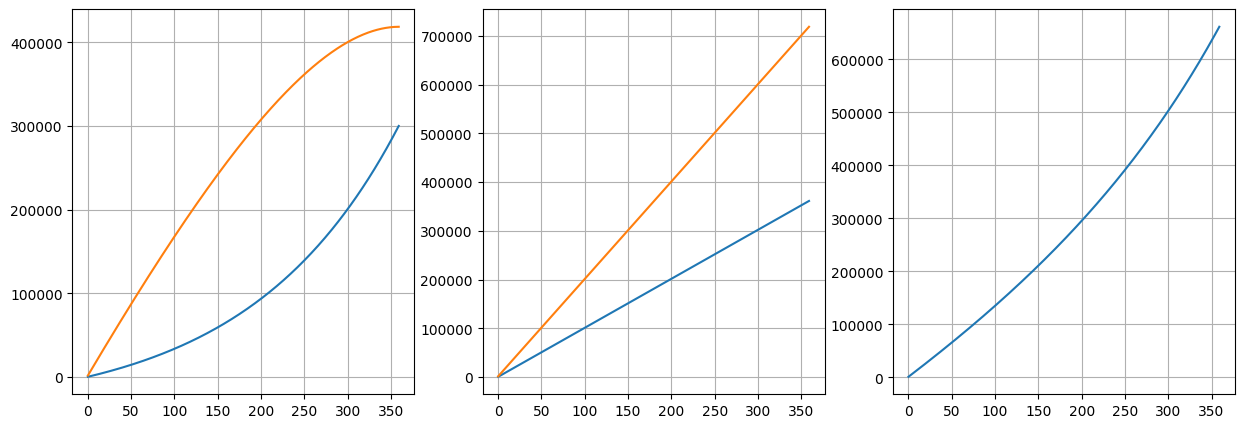

In [5]:
def plot_savings_situation(budget, price, rate, term):
    principal, interest, savings, total = simulate_savings_situation(budget, price, rate, term)
    print("After 12 years you will have paid\n\
          ${} in principal,\n\
          ${} in interest,\n\
          ${} in total,\n\
          ${} in savings".format(principal[144],
                                 interest[144],
                                 total[144],
                                 savings[144]))
    print("Your net worth will be ${}".format(savings[144]+principal[144]))
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(principal)
    ax[0].plot(interest)
    ax[1].plot(savings)
    ax[1].plot(total)
    net_worth = []
    for i in range(len(principal)):
        net_worth.append(principal[i] + savings[i])
    ax[2].plot(net_worth)
    for a in ax:
        a.grid()

plot_savings_situation(3000, 300000, 0.07, 30)

In [6]:
def simulate_payoff_situation(budget, price, rate, term):
    payment = calculate_monthly_payment(price, rate, term)
    print("Your Montly Payment is {}.".format(round(payment, 2)))
    principal = 0
    interest = 0
    savings = 0
    pList = []
    iList = []
    sList = []
    tList = []
    # Loop through every month
    for i in range(term*12):
        if principal < price:
            extra = budget - payment
            it, pt = amortization(price, rate, term, price-principal)
            pt = pt + extra
            savings = 0
        else:
            it = 0
            pt = 0
            savings = round(savings+budget, 2)
        principal = round(principal + pt, 2)
        interest = round(it + interest, 2)
        
        pList.append(principal)
        iList.append(interest)
        sList.append(savings)
        tList.append(principal+interest)  
    return pList, iList, sList, tList

Your Montly Payment is 1995.91.
After 12 years you will have paid
          $283757.11 in principal,
          $151242.89 in interest,
          $435000.0 in total,
          $0 in savings
Your net worth will be $283757.11


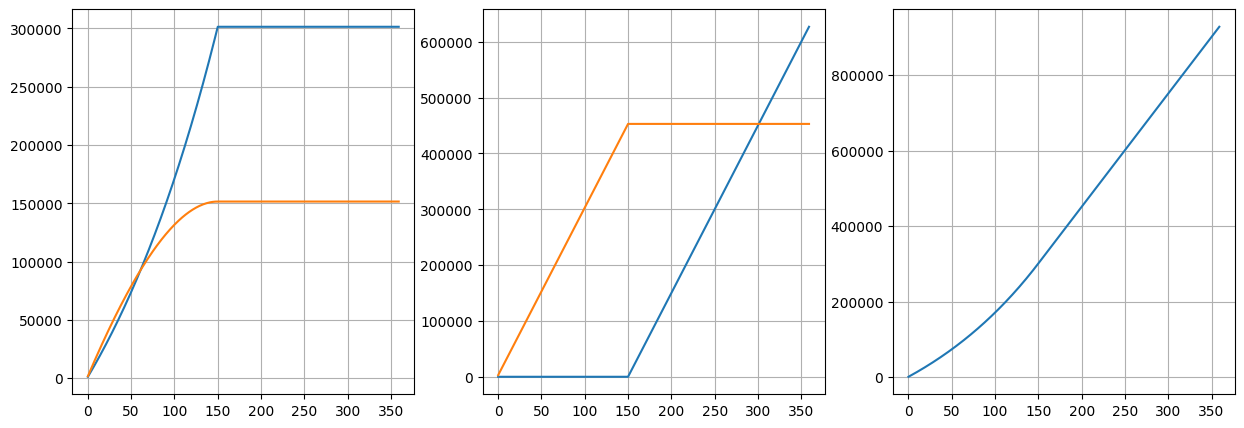

In [7]:
def plot_payoff_situation(budget, price, rate, term):
    principal, interest, savings, total = simulate_payoff_situation(budget, price, rate, term)
    print("After 12 years you will have paid\n\
          ${} in principal,\n\
          ${} in interest,\n\
          ${} in total,\n\
          ${} in savings".format(principal[144],
                                 interest[144],
                                 total[144],
                                 savings[144]))
    print("Your net worth will be ${}".format(savings[144]+principal[144]))
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(principal)
    ax[0].plot(interest)
    ax[1].plot(savings)
    ax[1].plot(total)
    net_worth = []
    for i in range(len(principal)):
        net_worth.append(principal[i] + savings[i])
    ax[2].plot(net_worth)
    for a in ax:
        a.grid()

plot_payoff_situation(3000, 300000, 0.07, 30)

In [8]:
def simulate_rent_situation(budget, rent, term):
    payment = rent
    print("Your Montly Payment is {}.".format(round(payment, 2)))
    total = 0
    savings = 0
    sList = []
    tList = []
    # Loop through every month
    for i in range(term*12):
        savings = round(savings + budget - payment, 2)
        total = round(total + rent, 2)
        sList.append(savings)
        tList.append(total)
    return sList, tList

Your Montly Payment is 1600.
After 12 years you will have paid
          $232000 in rent,
          $203000 in savings
Your net worth will be $203000


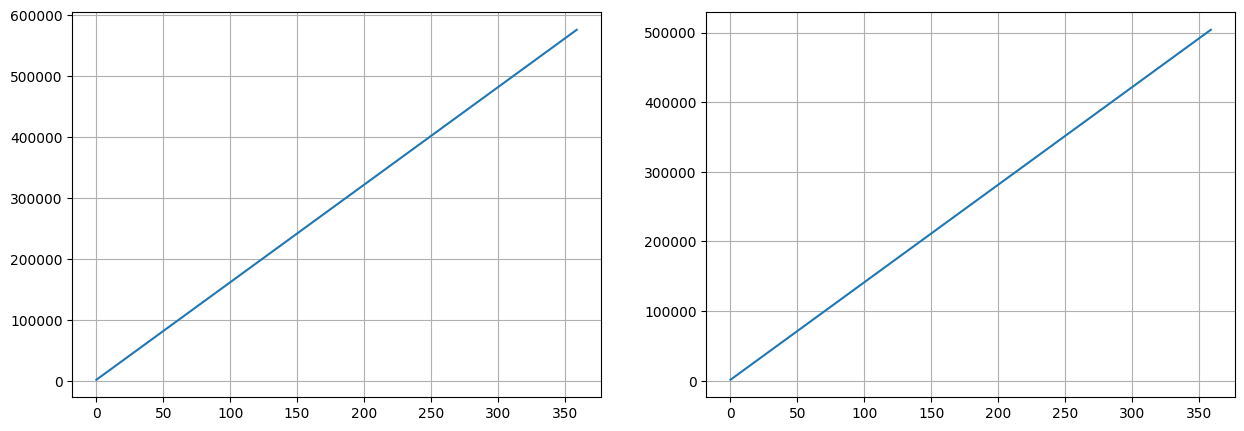

In [9]:
def plot_rent_situation(budget, rent, term):
    savings, total = simulate_rent_situation(budget, rent, term)
    print("After 12 years you will have paid\n\
          ${} in rent,\n\
          ${} in savings".format(total[144],
                                 savings[144]))
    print("Your net worth will be ${}".format(savings[144]))
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(total)
    ax[1].plot(savings)
    for a in ax:
        a.grid()

plot_rent_situation(3000, 1600, 30)

Your Montly Payment is 1600.
After 12 years you will have paid
          $232000 in rent,
          $203000 in savings
Your net worth will be $203000
Your Montly Payment is 1995.91.
After 12 years you will have paid
          $283757.11 in principal,
          $151242.89 in interest,
          $435000.0 in total,
          $0 in savings
Your net worth will be $283757.11
Your Montly Payment is 1995.91.
After 12 years you will have paid
          $55822.38 in principal,
          $233584.11 in interest,
          $289406.49 in total,
          $145593.05 in savings
Your net worth will be $201415.43


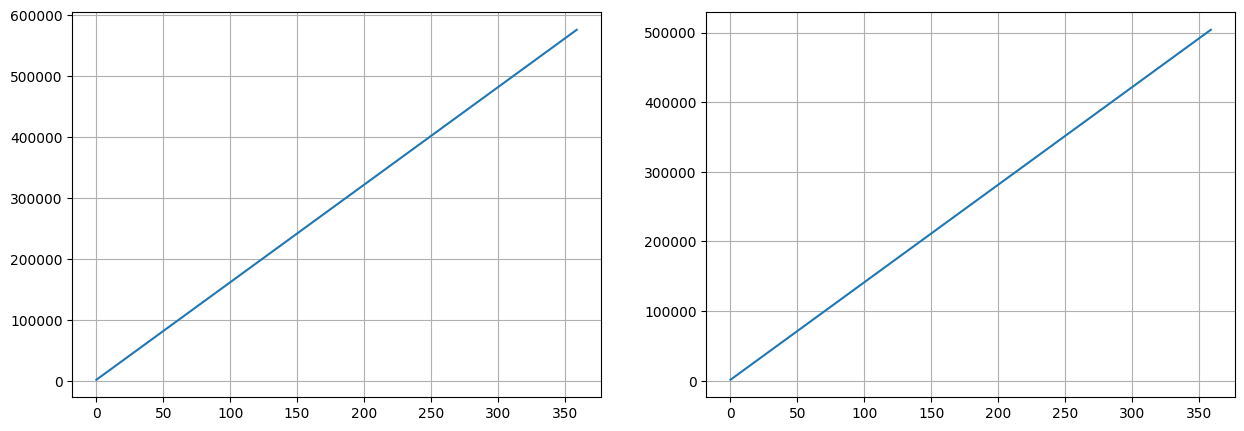

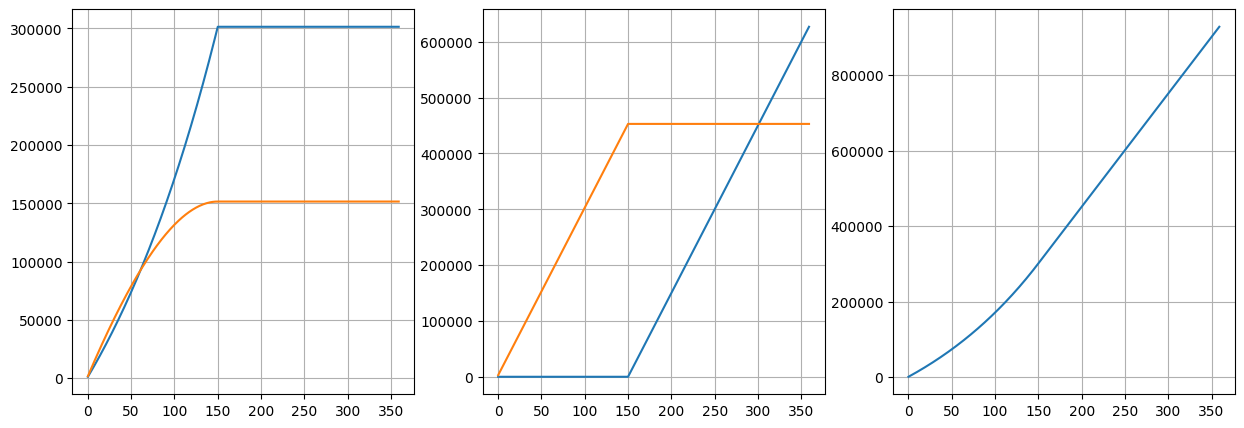

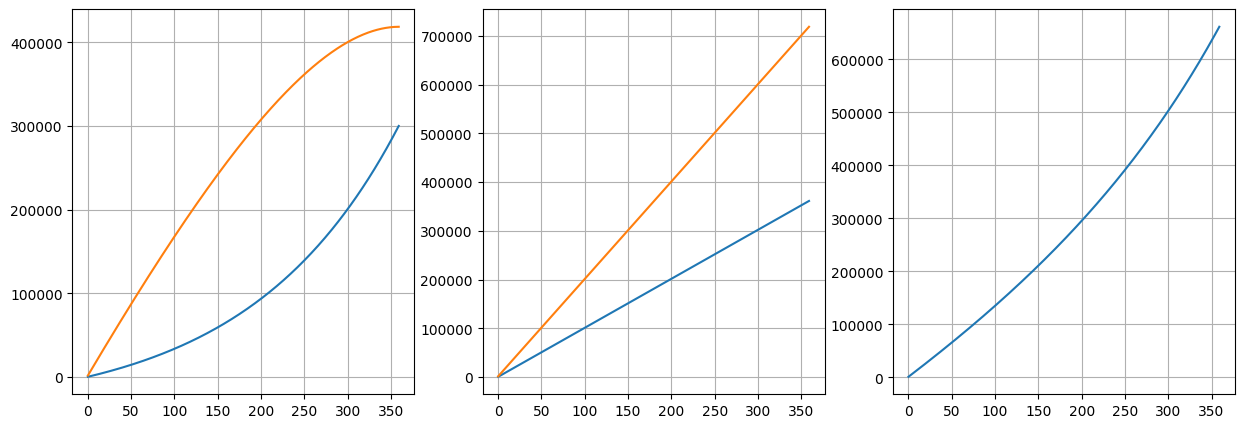

In [10]:
plot_rent_situation(3000, 1600, 30)
plot_payoff_situation(3000, 300000, 0.07, 30)
plot_savings_situation(3000, 300000, 0.07, 30)